In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [4]:
df = pd.read_csv('Dataset/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
x = df.drop(columns=['Date','GLD'],axis=1)
y = df['GLD']


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}


In [23]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 7
[LightGBM] [Info] Start training from score 122.901138


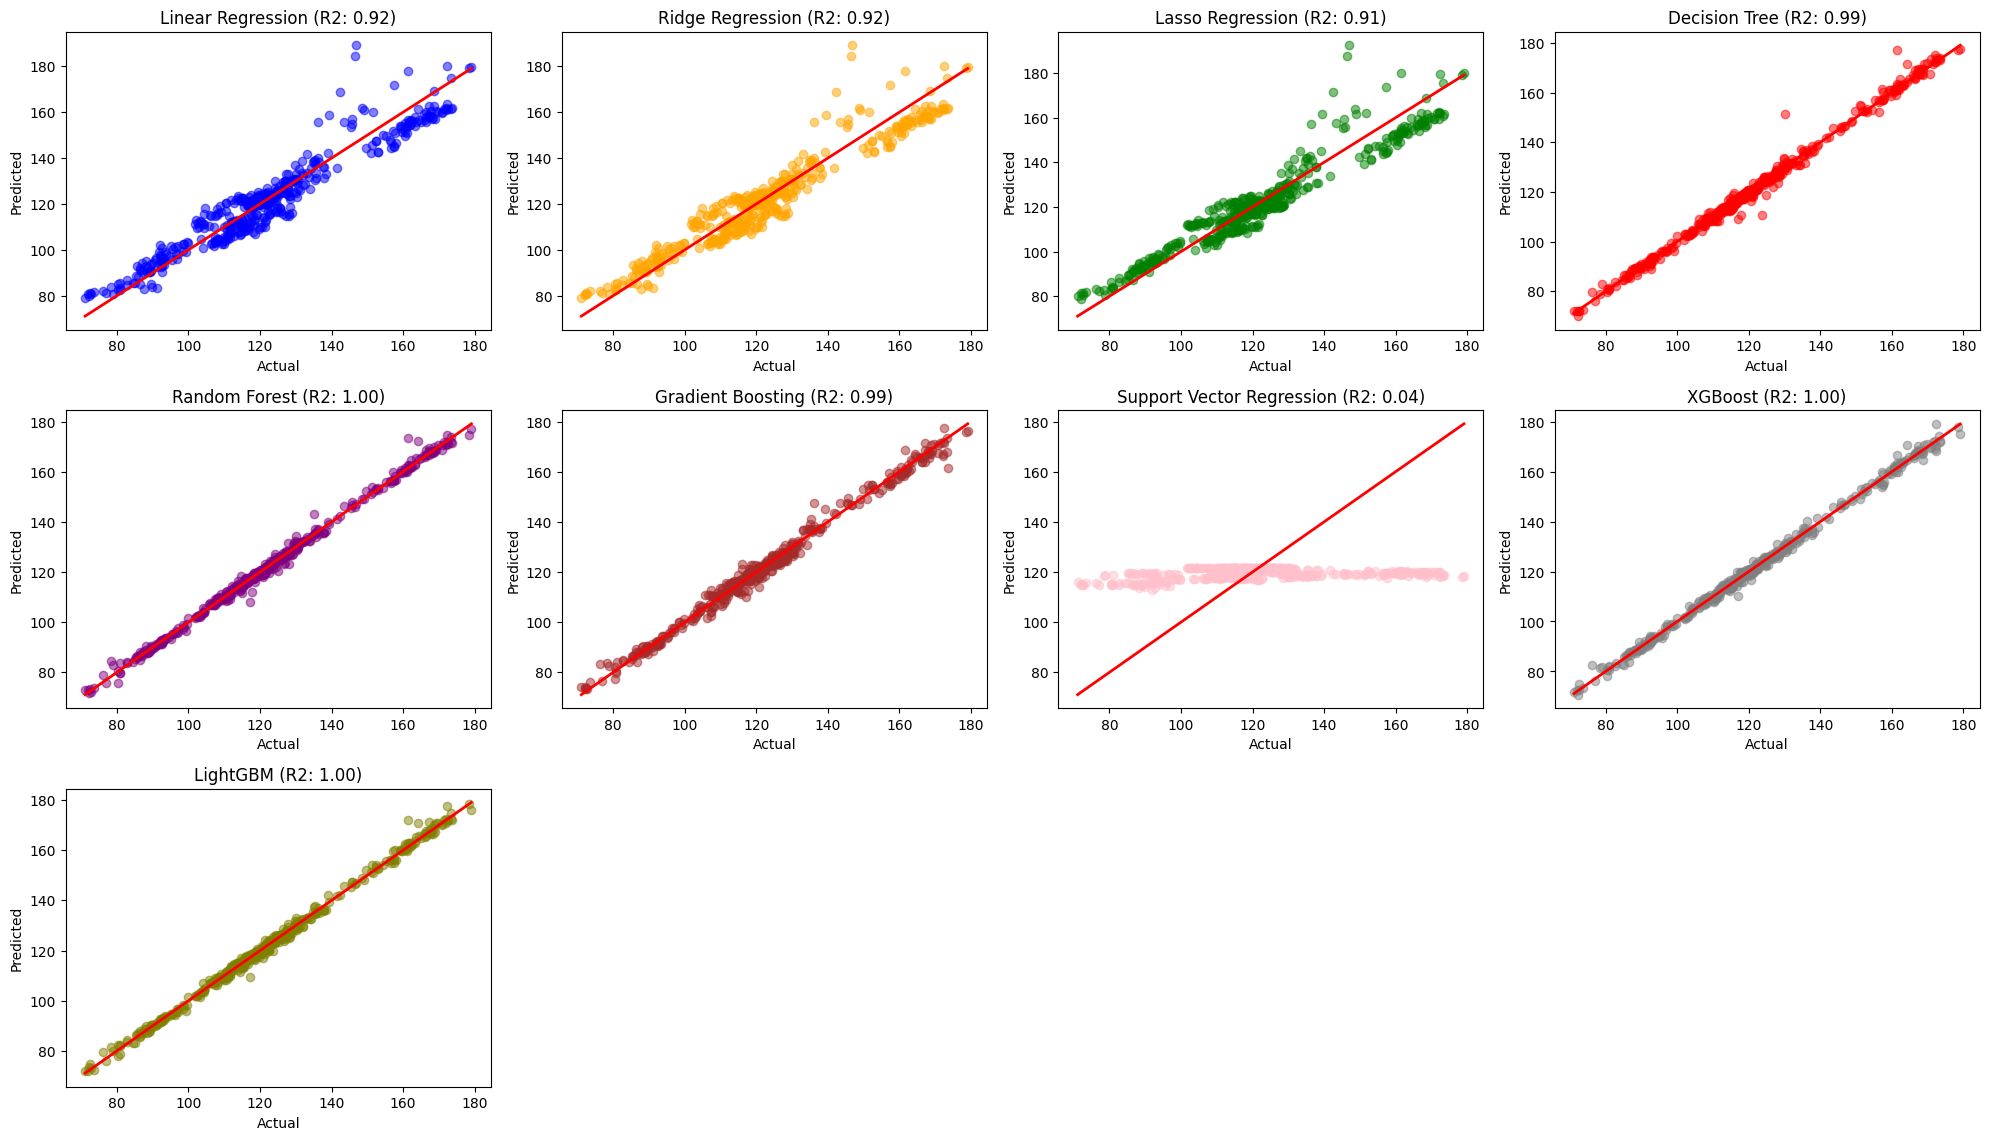

In [26]:
plt.figure(figsize=(20, 30))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'Mean absolute error': mae, 'Mean sqaure error': mse, 'R2 score': r2}
    plt.subplot(8, 4, i)
    plt.scatter(y_test, y_pred, color=col[i-1], label=name, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f'{name} (R2: {r2:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

In [27]:
result_df = pd.DataFrame(results).T
print(result_df)

                           Mean absolute error  Mean sqaure error  R2 score
Linear Regression                     5.152330          45.335314  0.917317
Ridge Regression                      5.149672          45.321866  0.917341
Lasso Regression                      5.205216          47.983802  0.912486
Decision Tree                         1.123035           4.090952  0.992539
Random Forest                         0.946219           2.278212  0.995845
Gradient Boosting                     1.688210           5.217805  0.990484
Support Vector Regression            17.028927         528.937836  0.035313
XGBoost                               0.986553           1.948589  0.996446
LightGBM                              1.003695           2.000524  0.996351
